In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import sys
sys.path.append('../python')
import dataPython as dp
import scipy.interpolate as inter

from datetime import datetime
import scipy.integrate as si
import noordermeer as noord
import time

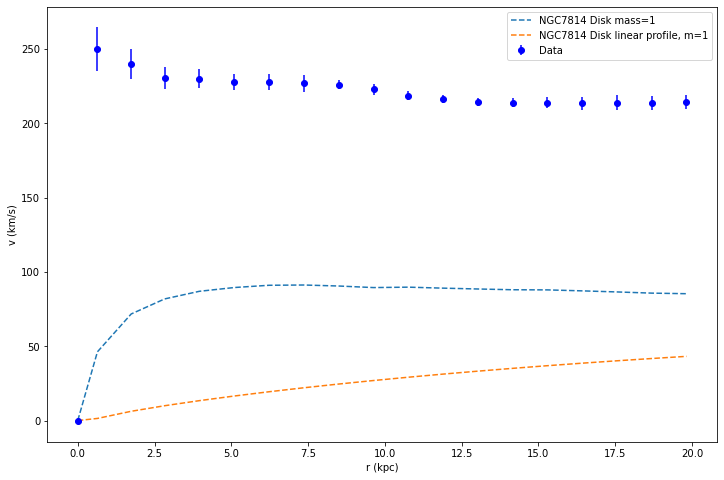

In [6]:
'''
source [1]: 
https://www.aanda.org/articles/aa/pdf/2011/07/aa16634-11.pdf
run in gipsy
Zlaw = sech-squared ???
Z0=.88 kpc (paper table 4 gives hz=.44kpc where z0=2*hz)
D=14.6 Mpc (paper table 1)
density profile Y
UNITS=kpc,mag/arcsec**2
RADDENS=<NGC7814disk4
MASS=80 ???? (stellar mass....)
RADII=0,0.64,1.74,2.83,3.96,5.10,6.23,7.36,8.49,9.63,10.76,11.89,13.02,14.16,15.29,16.42,17.55,18.69,19.82
(same points as raw data, table 3)
'''

data = dp.getXYdata_wXYerr('ngc7814data')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err1 = np.asarray(data['ey'])

dat2_import = dp.getXYZdata('hoop.dat')
r2 = dat2_import['xx']
v2_file = dat2_import['zz']

dat2_import = dp.getXYZdata('plzwork.dat')
rX = dat2_import['xx']
vX = dat2_import['zz']

X=9.25 #disk M-L ratio provided in [1] 
plt.figure(figsize=(12,8))

plt.plot(r2,X*np.asarray(v2_file),'--',label='NGC7814 Disk mass=1')
plt.plot(rX,X*np.asarray(vX),'--',label='NGC7814 Disk linear profile, m=1')
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
plt.xlabel('r (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()

## paper uses extrapolated photometric profile (fig 7), not the actual points (provided by sparc)????

[0.21, 0.42, 0.63, 0.84, 1.05, 1.26, 1.47, 1.68, 1.9, 2.1, 2.32, 2.53, 2.74, 2.95, 3.16, 3.37, 3.58, 3.79, 4.0, 4.39, 4.83, 5.31, 5.85, 6.43, 7.07, 7.78, 8.56, 9.42, 10.36, 11.39, 12.53, 13.78, 15.16, 16.68, 18.35, 20.18, 22.2, 24.42, 26.86, 29.55, 32.5, 35.75, 39.33, 43.26, 47.59, 52.35, 57.58, 63.34, 69.68, 76.64, 84.31, 92.74, 102.01, 112.21, 123.43, 135.78, 149.36, 164.29, 180.72, 198.79, 218.67]
44
[218.67]


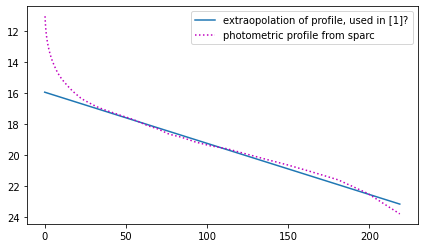

In [3]:
# from https://arxiv.org/pdf/1606.09251.pdf fig 5

fromplot_import = dp.getXYdata('NGC7814disk4.rcl')
r_fromplot = fromplot_import['xx']
v_fromplot = fromplot_import['yy']

plt.figure(figsize=(7,4))
r_fromplot2 = r_fromplot[44:]
v_fromplot2 = v_fromplot[44:]

m, b = np.polyfit(r_fromplot2, v_fromplot2, 1)
def y(x):
    return m*x+b
x0=r_fromplot[-1:]
x=np.linspace(0,x0,100)

rt = dp.getXYdata('NGC7814disk4.rcl')
r_fromplot = fromplot_import['xx']
v_fromplot = fromplot_import['yy']


plt.plot(x,y(x),markersize=30,label='extraopolation of profile, used in [1]?')
plt.plot(r_fromplot,v_fromplot,':',color='m',markersize=10,label='photometric profile from sparc')
plt.gca().invert_yaxis()
plt.legend()
print(r_fromplot)
A=[0.21, 0.42, 0.63, 0.84, 1.05, 1.26, 1.47, 1.68, 1.9, 2.1, 2.32, 2.53, 2.74, 2.95, 3.16, 3.37, 3.58, 3.79, 4.0, 4.39, 4.83, 5.31, 5.85, 6.43, 7.07, 7.78, 8.56, 9.42, 10.36, 11.39, 12.53, 13.78, 15.16, 16.68, 18.35, 20.18, 22.2, 24.42, 26.86, 29.55, 32.5, 35.75, 39.33, 43.26]
print(len(A))
print(r_fromplot[-1:])

In [4]:
r_fromplot2 = r_fromplot[44:]
v_fromplot2 = v_fromplot[44:]

m, b = np.polyfit(r_fromplot2, v_fromplot2, 1)

In [5]:
import csv
r=np.array([x]).T
v=np.array([y(x)]).T

print(r)
with open("new_file.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(a)

[[[  0.        ]
  [  2.20878788]
  [  4.41757576]
  [  6.62636364]
  [  8.83515152]
  [ 11.04393939]
  [ 13.25272727]
  [ 15.46151515]
  [ 17.67030303]
  [ 19.87909091]
  [ 22.08787879]
  [ 24.29666667]
  [ 26.50545455]
  [ 28.71424242]
  [ 30.9230303 ]
  [ 33.13181818]
  [ 35.34060606]
  [ 37.54939394]
  [ 39.75818182]
  [ 41.9669697 ]
  [ 44.17575758]
  [ 46.38454545]
  [ 48.59333333]
  [ 50.80212121]
  [ 53.01090909]
  [ 55.21969697]
  [ 57.42848485]
  [ 59.63727273]
  [ 61.84606061]
  [ 64.05484848]
  [ 66.26363636]
  [ 68.47242424]
  [ 70.68121212]
  [ 72.89      ]
  [ 75.09878788]
  [ 77.30757576]
  [ 79.51636364]
  [ 81.72515152]
  [ 83.93393939]
  [ 86.14272727]
  [ 88.35151515]
  [ 90.56030303]
  [ 92.76909091]
  [ 94.97787879]
  [ 97.18666667]
  [ 99.39545455]
  [101.60424242]
  [103.8130303 ]
  [106.02181818]
  [108.23060606]
  [110.43939394]
  [112.64818182]
  [114.8569697 ]
  [117.06575758]
  [119.27454545]
  [121.48333333]
  [123.69212121]
  [125.90090909]
  [128.1096969

NameError: name 'a' is not defined